In [1]:
import numpy as np
import torchvision
import torch
from torch import nn, optim
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,)), ])

trainset = datasets.MNIST('MNISt', download=True, train=True, transform=transform)
testset = datasets.MNIST('MNISt', download=True, train=False, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)



In [2]:
dataiter = iter(trainloader)
images, lables = dataiter.next()

print(images.shape)
print(lables.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


tensor(2)


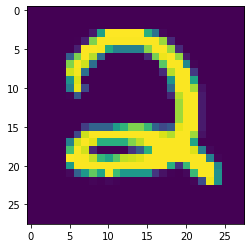

In [3]:
plt.imshow(images[0].reshape(28, 28))
print(lables[0])

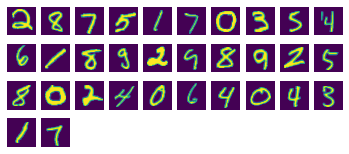

In [4]:
figure = plt.figure()
num_of_images = 32
for index in range(1, num_of_images+1):
    plt.subplot(6, 10, index)
    plt.axis("off")
    plt.imshow(images[index-1].reshape(28, 28))

In [5]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]), 
                      nn.ReLU(), 
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]), 
                      nn.ReLU(), 
                      nn.Linear(hidden_sizes[1], output_size), 
                      nn.LogSoftmax(dim=1))

print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [6]:
criterion = nn.NLLLoss()
images, lables = next(iter(trainloader))
images = images.view(images.shape[0], -1)
logps = model(images)
loss = criterion(logps, lables)

print(model[0].weight.grad)
loss.backward()
print(model[0].weight.grad)


None
tensor([[ 0.0033,  0.0033,  0.0033,  ...,  0.0033,  0.0033,  0.0033],
        [-0.0021, -0.0021, -0.0021,  ..., -0.0021, -0.0021, -0.0021],
        [ 0.0001,  0.0001,  0.0001,  ...,  0.0001,  0.0001,  0.0001],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0014, -0.0014, -0.0014,  ..., -0.0014, -0.0014, -0.0014],
        [-0.0004, -0.0004, -0.0004,  ..., -0.0004, -0.0004, -0.0004]])


In [7]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

ValueError: Expected input batch_size (32) to match target batch_size (64).

In [ ]:
correct_count, all_count = 0, 0
ps_count = []
for images,labels in testloader:
    for i in range(len(labels)):
        img = images[i].view(1, 784)
        with torch.no_grad():
            logps = model(img)


        ps = torch.exp(logps)
        ps_count.append(ps)
        probab = list(ps.numpy()[0])
        pred_label = probab.index(max(probab))
        true_label = labels.numpy()[i]
        if(true_label == pred_label):
            correct_count += 1
        all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))
print(len(ps_count))